In [119]:
import pandas as pd

In [120]:
df = pd.read_excel(r'C:\Users\samas\Downloads\Phillips_xls\Phillips.xls', sheet_name = 'Monthly')

In [121]:
df

,observation_date,CPILFESL,UNRATE,WTISPLC
0,1946-01-01,NaN,NaN,1.17
1,1946-02-01,NaN,NaN,1.17
2,1946-03-01,NaN,NaN,1.17
3,1946-04-01,NaN,NaN,1.27
4,1946-05-01,NaN,NaN,1.27
...,...,...,...,...
897,2020-10-01,269.350,6.9,39.40
898,2020-11-01,269.819,6.7,40.94
899,2020-12-01,269.940,6.7,47.02
900,2021-01-01,270.025,6.3,52.00


In [122]:
mask = (df.observation_date >= '1980-01-01') & (df.observation_date <= '1994-12-01')

In [123]:
df1 = df.loc[mask]

In [124]:
df1

,observation_date,CPILFESL,UNRATE,WTISPLC
408,1980-01-01,76.7,6.3,32.50
409,1980-02-01,77.5,6.3,37.00
410,1980-03-01,78.6,6.3,38.00
411,1980-04-01,79.5,6.9,39.50
412,1980-05-01,80.1,7.5,39.50
...,...,...,...,...
583,1994-08-01,157.1,6.0,18.38
584,1994-09-01,157.5,5.9,17.46
585,1994-10-01,157.8,5.8,17.71
586,1994-11-01,158.2,5.6,18.10


In [125]:
df1['year'] = pd.DatetimeIndex(df1.observation_date).year

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [126]:
df1['month'] = pd.DatetimeIndex(df1.observation_date).month

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [127]:
import numpy as np

In [128]:
g = df1.groupby(['year'])
annual_average_CPI = g.aggregate({'CPILFESL' : np.mean}) 

In [129]:
annual_average_CPI

,CPILFESL
year,
1980,80.783333
1981,89.250000
1982,95.850000
1983,99.600000
1984,104.700000
1985,109.283333
1986,113.708333
1987,118.175000
1988,123.425000


In [130]:
annual_average_UNRATE = g.aggregate({'UNRATE' : np.mean})

In [131]:
annual_average_UNRATE_gap = annual_average_UNRATE - 6

In [132]:
annual_average_UNRATE_gap

,UNRATE
year,
1980,1.175000
1981,1.616667
1982,3.708333
1983,3.600000
1984,1.508333
1985,1.191667
1986,1.000000
1987,0.175000
1988,-0.508333


In [133]:
annual_inflation_CPI = annual_average_CPI.pct_change()

In [134]:
annual_inflation_CPI = annual_inflation_CPI * 100

In [135]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [136]:
annual_average_UNRATE_gap['inflation_CPI'] = annual_inflation_CPI.CPILFESL

In [137]:
annual_average_UNRATE_gap['Year'] = annual_average_UNRATE_gap.index

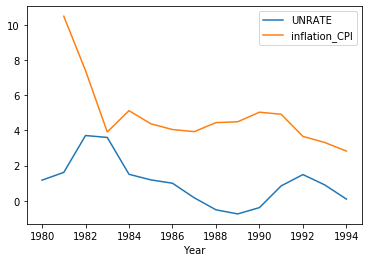

In [138]:
annual_average_UNRATE_gap.plot(x ='Year' , y = ['UNRATE', 'inflation_CPI'])

In [139]:
df2 = pd.read_excel(r'C:\Users\samas\Downloads\Phillips_xls\Phillips.xls', sheet_name = 'Quarterly')

In [140]:
df2

,observation_date,COMPNFB,ECIWAG_20050128,ECIWAG,GDPDEF
0,1947-01-01,3.708,NaN,NaN,11.960
1,1947-04-01,3.792,NaN,NaN,12.131
2,1947-07-01,3.905,NaN,NaN,12.335
3,1947-10-01,3.997,NaN,NaN,12.639
4,1948-01-01,4.092,NaN,NaN,12.739
...,...,...,...,...,...
291,2019-10-01,121.235,NaN,138.9,112.950
292,2020-01-01,123.847,NaN,140.3,113.415
293,2020-04-01,130.777,NaN,140.8,112.817
294,2020-07-01,128.833,NaN,141.5,113.840


In [141]:
mask1 = (df2.observation_date >= '1980-01-01') & (df2.observation_date <= '1994-10-01')

In [170]:
df3 = df2.loc[mask1]

In [171]:
df3

,observation_date,COMPNFB,ECIWAG_20050128,ECIWAG,GDPDEF
132,1980-01-01,26.482,63.1,0.0,40.801
133,1980-04-01,27.202,64.5,0.0,41.772
134,1980-07-01,27.896,65.9,0.0,42.705
135,1980-10-01,28.637,67.3,0.0,43.818
136,1981-01-01,29.357,69.0,0.0,44.972
137,1981-04-01,29.864,70.5,0.0,45.863
138,1981-07-01,30.536,71.8,0.0,46.726
139,1981-10-01,31.041,73.2,0.0,47.534
140,1982-01-01,31.864,74.6,0.0,48.188
141,1982-04-01,32.113,75.5,0.0,48.814


In [144]:
df3['year'] = pd.DatetimeIndex(df3.observation_date).year

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [145]:
h = df3.groupby(['year'])

In [146]:
annual_average_COMP = h.aggregate({'COMPNFB' : np.mean})

In [147]:
annual_average_GDPDEF = h.aggregate({'GDPDEF': np.mean})

In [148]:
annual_average_GDPDEF = annual_average_GDPDEF.pct_change() * 100

In [149]:
annual_average_COMP = annual_average_COMP.pct_change() * 100

In [150]:
annual_average_UNRATE_gap['inflation_COMP'] = annual_average_COMP.COMPNFB

In [151]:
annual_average_UNRATE_gap['inflation_GDPDEF'] = annual_average_GDPDEF.GDPDEF

In [152]:
annual_average_UNRATE_gap

,UNRATE,inflation_CPI,Year,inflation_COMP,inflation_GDPDEF
year,,,,,
1980,1.175000,NaN,1980,NaN,NaN
1981,1.616667,10.480710,1981,9.600152,9.461489
1982,3.708333,7.394958,1982,7.364360,6.176288
1983,3.600000,3.912363,1983,4.428886,3.893613
1984,1.508333,5.120482,1984,4.294954,3.618394
1985,1.191667,4.377587,1985,4.898942,3.166373
1986,1.000000,4.049108,1986,5.776953,2.018638
1987,0.175000,3.928179,1987,3.781542,2.465061
1988,-0.508333,4.442564,1988,5.121663,3.525142


## Q1

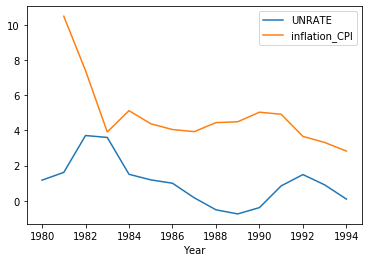

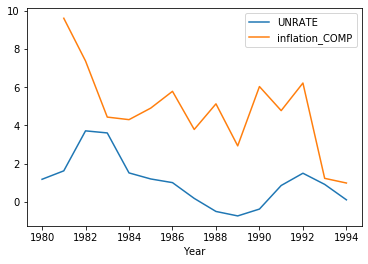

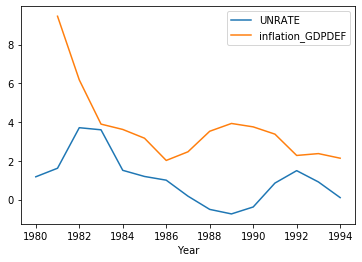

In [173]:
annual_average_UNRATE_gap.plot(x ='Year' , y = ['UNRATE', 'inflation_CPI'])
annual_average_UNRATE_gap.plot(x ='Year' , y = ['UNRATE', 'inflation_COMP'])
annual_average_UNRATE_gap.plot(x ='Year' , y = ['UNRATE', 'inflation_GDPDEF'])

## Q2
